<a href="https://colab.research.google.com/github/ArunK-ML/ML-Regression-Model---Concrete-Mix-Strength---Dataset/blob/main/Concrete_Strength_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
df = pd.read_csv("/content/Concrete_Strength_clean.csv")
df

,Unnamed: 0,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Passing_0.6_mm_Sieve_(%),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Additive_Type_&_Dosage_(/100_kg_of_cement),...,Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Type_of_Coarse_Aggregate,Type_of_Fine_Aggregate,Passing_0.6mm_Sieve(%),Additive_Type_&_Dos._(/100_Kg_of_cement),Admix_type,Admix_dosage
0,0,Crushed,Natural,1,0.0,43.0,365,0.52,225,0,...,160,2407,21.8,26.3,0,0,0.0,0,0,0
1,1,Crushed,Natural,1,0.0,35.0,365,0.52,225,0,...,160,2403,26.3,35.3,0,0,0.0,0,0,0
2,2,Crushed,Natural,2,45.6,38.0,350,0.53,185,type SP 801 dos 1 lit,...,120,2475,32.7,44.9,0,0,0.0,0,0,0
3,3,Natural,Natural,2,57.9,38.0,340,0.49,165,Sp 432 0.9 lit,...,190,2412,30.3,41.0,0,0,0.0,0,0,0
4,4,Natural,Natural,2,19.5,38.0,325,0.51,165,sp432 dos 1.0 lit,...,170,2404,27.0,0.0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,2280,Natural,Natural,2,0.0,43.0,375,0.48,180,0,...,150,2404,24.8,0.0,Natural,Natural,32.8,0,0,0
2278,2281,Natural,Natural,2,0.0,43.0,375,0.45,170,0,...,175,2404,34.7,42.3,Natural,Natural,0.0,Type Rehobuild 850 * Dos. 0.75 lit,Type Rehobuild 850,Dos. 0.75 lit
2279,2282,Crushed,Natural,2,0.0,43.0,365,0.51,185,0,...,135,2454,35.4,42.5,Crushed,Natural,30.4,Type Sp(Fdn-5) * Dos 2.5,Type Sp(Fdn-5),Dos 2.5
2280,2283,Natural,Natural,2,0.0,43.0,385,0.47,180,0,...,95,2386,25.9,0.0,Natural,Natural,42.6,0,0,0


In [71]:
df.shape

(2282, 23)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  2282 non-null   int64  
 1   Type_of_course_Aggregate                    2282 non-null   object 
 2   Type_of_Fine_Aggregate_                     2282 non-null   object 
 3   Max._Size_of_Coarse_Aggregate_(mm)          2282 non-null   int64  
 4   Passing_0.6_mm_Sieve_(%)                    2282 non-null   float64
 5   Target_Mean_Strength_(N/mm2)                2282 non-null   float64
 6   Cement_O.P.C_(Kg/m3)                        2282 non-null   int64  
 7   W/C_Ratio                                   2282 non-null   float64
 8   Water_Content_(Kg/m3)                       2282 non-null   int64  
 9   Additive_Type_&_Dosage_(/100_kg_of_cement)  2282 non-null   object 
 10  Total_Aggreg

In [73]:
df.drop(columns=["Unnamed: 0","Type_of_Coarse_Aggregate","Type_of_Fine_Aggregate"],inplace=True)

In [74]:
df["Target_Mean_Strength_(N/mm2)"].unique()

array([43. , 35. , 38. , 25. , 48. , 28. , 39. , 42. ,  0. , 43.1, 40.4,
       38.5])

In [75]:
df["Max._Size_of_Coarse_Aggregate_(mm)"].unique()

array([1, 2, 0])

In [76]:
df["Max._Size_of_Coarse_Aggregate_(mm)"] = df["Max._Size_of_Coarse_Aggregate_(mm)"].replace({"n":"0"})

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Type_of_course_Aggregate                    2282 non-null   object 
 1   Type_of_Fine_Aggregate_                     2282 non-null   object 
 2   Max._Size_of_Coarse_Aggregate_(mm)          2282 non-null   int64  
 3   Passing_0.6_mm_Sieve_(%)                    2282 non-null   float64
 4   Target_Mean_Strength_(N/mm2)                2282 non-null   float64
 5   Cement_O.P.C_(Kg/m3)                        2282 non-null   int64  
 6   W/C_Ratio                                   2282 non-null   float64
 7   Water_Content_(Kg/m3)                       2282 non-null   int64  
 8   Additive_Type_&_Dosage_(/100_kg_of_cement)  2282 non-null   object 
 9   Total_Aggregate_(Kg/m3)                     2282 non-null   int64  
 10  Fine_Aggrega

In [78]:
df.duplicated().sum()

np.int64(1169)

In [79]:
df = df.drop_duplicates()

In [80]:
df.duplicated().sum()

np.int64(0)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1884
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Type_of_Fine_Aggregate_                           1113 non-null   int64  
 1   Max._Size_of_Coarse_Aggregate_(mm)                1113 non-null   int64  
 2   Passing_0.6_mm_Sieve_(%)                          1113 non-null   float64
 3   Target_Mean_Strength_(N/mm2)                      1113 non-null   float64
 4   Cement_O.P.C_(Kg/m3)                              1113 non-null   int64  
 5   W/C_Ratio                                         1113 non-null   float64
 6   Water_Content_(Kg/m3)                             1113 non-null   int64  
 7   Total_Aggregate_(Kg/m3)                           1113 non-null   int64  
 8   Fine_Aggregate_(Kg/m3)                            1113 non-null   int64  
 9   Coarse_Aggregate_(Kg/m3)

In [82]:
df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [115]:
df["Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean"] = df["Additive_Type_&_Dosage_(/100_kg_of_cement)"] + df["Additive_Type_&_Dos._(/100_Kg_of_cement)"]
df["Passing_0.6_mm_Sieve_(%)_Clean"] = df["Passing_0.6_mm_Sieve_(%)"] + df["Passing_0.6mm_Sieve(%)"]

KeyError: 'Additive_Type_&_Dosage_(/100_kg_of_cement)'

In [112]:

df = df.drop(columns=['Additive_Type_&_Dosage_(/100_kg_of_cement)',"Additive_Type_&_Dos._(/100_Kg_of_cement)"
                      ,"Passing_0.6_mm_Sieve_(%)","Passing_0.6mm_Sieve(%)"])

In [113]:
df.shape

(1113, 18)

In [86]:
df["Type_of_course_Aggregate"].unique()

array(['Crushed', 'Natural'], dtype=object)

In [87]:
df["Type_of_Fine_Aggregate_"].unique()

array(['Natural', 'Crushed'], dtype=object)

In [88]:
df["Max._Size_of_Coarse_Aggregate_(mm)"].unique()

array([1, 2, 0])

In [89]:
df['Max._Size_of_Coarse_Aggregate_(mm)'] = df['Max._Size_of_Coarse_Aggregate_(mm)'].replace({
    1 : 40,
    2 : 20,
    0 : 0
})

/tmp/ipython-input-627795874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max._Size_of_Coarse_Aggregate_(mm)'] = df['Max._Size_of_Coarse_Aggregate_(mm)'].replace({


In [90]:
df["Additive_Type_&_Dosage_(/100_kg_of_cement)"].unique()

array(['0', 'type SP 801 dos 1 lit', 'Sp 432 0.9 lit ',
       'sp432 dos 1.0 lit', 'sikamentR2004 dos .8',
       'consplat RP 364 *dos .8', 'rheobuaile850 1.2 of cement by weight',
       'Type RHEOBUILD 850 * Dos. 1.25 lit', 'type dos 1 lit',
       'plastment rx-xr .8 lit', 'R2004 dos 1.65 lit',
       'type sikament 2004*dos. 1 lit', 'Type SP 432 * Dos. 1.0 lit',
       'Type kem Flow * Dos. 0.8 lit ',
       'Sikament - R2004 * Dos * 1.25 lit', 'X-MIXHPN DOS . 1.5 LIT',
       'x-mix HPN dos 1.5 lit', 'x-mix RPS dos .7 lit',
       'R2004 * Dos * 0.8 lit', 'Sikament - R 2004 1.0 lit ',
       'type euro 8600*dos. 1.0 lit', 'R2004 * Dos * 0.7 lit',
       'Tyoe SP - 337 * Dos. 1.0 lit', 'Type SP - 337 Dos. 1.0 lit',
       'sptjm R11 dos 1% of cement by weight',
       'sbtjm r-11- dos 1% of cement by weight',
       'Type RX * Dosage 0.75 lit', 'Euro PLAST 8600 Dos. *0.75 lit ',
       'Euro 8600 Dos. *1.0 lit ', 'Type RX * Dosage 0.5 lit',
       'Euro 8600 Dos. *0.5 lit ', 'Sik

In [91]:
df["Additive_Type_&_Dosage_(/100_kg_of_cement)"].replace({ "0":"No Dosage"})

,Additive_Type_&_Dosage_(/100_kg_of_cement)
0,No Dosage
1,No Dosage
2,type SP 801 dos 1 lit
3,Sp 432 0.9 lit
4,sp432 dos 1.0 lit
...,...
1542,No Dosage
1543,No Dosage
1544,No Dosage
1545,No Dosage


In [92]:
df["Additive_Type_&_Dosage_(/100_kg_of_cement)"].value_counts()

,count
Additive_Type_&_Dosage_(/100_kg_of_cement),
0,883
type SP 801 dos 1 lit,28
Sp 432 0.9 lit,23
sikamentR2004 dos .8,10
Type SP901* Dos 1.0 lit,9
...,...
Type Sp701 * Dos. 1.2 lit,1
Type SP 8001 * Dos. 1.0 lit,1
.4%plastment rx-sr .75%of sikament 163m by weight of cement,1


In [93]:
df['Max._Size_of_Coarse_Aggregate_(mm)'].astype("int")

,Max._Size_of_Coarse_Aggregate_(mm)
0,40
1,40
2,20
3,20
4,20
...,...
1542,40
1543,40
1544,40
1545,40


In [94]:
df.to_csv("Concrete_Strength_clean")

# **Encoder**

In [95]:
from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in df.select_dtypes(include="object").columns:
  df[i] = df[i].astype(str) # Convert to string before encoding
  df[i] = code.fit_transform(df[i])

/tmp/ipython-input-3443388302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype(str) # Convert to string before encoding
/tmp/ipython-input-3443388302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = code.fit_transform(df[i])
/tmp/ipython-input-3443388302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

# **Correlation testing**

In [96]:
corr_matrix = df.corr()
corr_matrix

,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Passing_0.6_mm_Sieve_(%),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Additive_Type_&_Dosage_(/100_kg_of_cement),Total_Aggregate_(Kg/m3),...,Coarse_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Passing_0.6mm_Sieve(%),Additive_Type_&_Dos._(/100_Kg_of_cement),Admix_type,Admix_dosage,Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean
Type_of_course_Aggregate,1.000000,0.092961,0.516137,0.107181,-0.087336,-0.245210,-0.367769,-0.556616,0.026212,-0.230031,...,0.264692,0.007058,-0.009536,-0.156966,-0.045721,0.011476,-0.049759,-0.050997,0.011290,-0.047880
Type_of_Fine_Aggregate_,0.092961,1.000000,-0.033515,-0.027372,0.057871,0.031686,-0.150882,-0.099858,-0.004976,-0.009080,...,0.091533,0.030619,0.000003,-0.037854,-0.010450,0.012572,0.045697,0.046658,-0.038755,-0.037984
Max._Size_of_Coarse_Aggregate_(mm),0.516137,-0.033515,1.000000,0.085305,-0.051101,-0.147059,-0.189123,-0.311902,-0.051454,-0.124628,...,0.303117,-0.167675,0.009043,-0.165052,-0.055159,0.020656,-0.077697,-0.079995,0.047820,-0.147982
Passing_0.6_mm_Sieve_(%),0.107181,-0.027372,0.085305,1.000000,-0.653652,-0.525023,0.407937,0.004210,0.423329,0.174350,...,0.011507,-0.164407,0.040761,-0.265012,-0.058688,-0.141831,-0.515514,-0.526356,0.437196,0.133100
Target_Mean_Strength_(N/mm2),-0.087336,0.057871,-0.051101,-0.653652,1.000000,0.470692,-0.384560,-0.007486,-0.332761,-0.182459,...,0.085422,0.205726,-0.016415,0.247996,0.065069,0.136162,0.494697,0.503587,-0.428566,-0.067627
Cement_O.P.C_(Kg/m3),-0.245210,0.031686,-0.147059,-0.525023,0.470692,1.000000,-0.413470,0.289912,-0.405808,-0.419971,...,-0.017099,0.146628,-0.012339,0.181610,0.043851,0.074603,0.304330,0.310123,-0.252352,-0.224911
W/C_Ratio,-0.367769,-0.150882,-0.189123,0.407937,-0.384560,-0.413470,1.000000,0.556099,0.133133,0.187884,...,-0.128065,-0.349157,0.037701,-0.245950,-0.059496,-0.083702,-0.412499,-0.424743,0.387398,-0.112279
Water_Content_(Kg/m3),-0.556616,-0.099858,-0.311902,0.004210,-0.007486,0.289912,0.556099,1.000000,-0.191967,-0.113489,...,-0.163045,-0.187887,0.019359,-0.073605,-0.018594,-0.020311,-0.165311,-0.171738,0.160966,-0.262103
Additive_Type_&_Dosage_(/100_kg_of_cement),0.026212,-0.004976,-0.051454,0.423329,-0.332761,-0.405808,0.133133,-0.191967,1.000000,0.246213,...,-0.158246,0.137934,-0.014525,0.048304,0.034596,-0.074043,-0.269124,-0.274784,0.228238,0.732284
Total_Aggregate_(Kg/m3),-0.230031,-0.009080,-0.124628,0.174350,-0.182459,-0.419971,0.187884,-0.113489,0.246213,1.000000,...,-0.068200,0.003750,0.009584,0.053645,-0.016483,-0.039842,0.010712,0.011988,-0.004261,0.269820


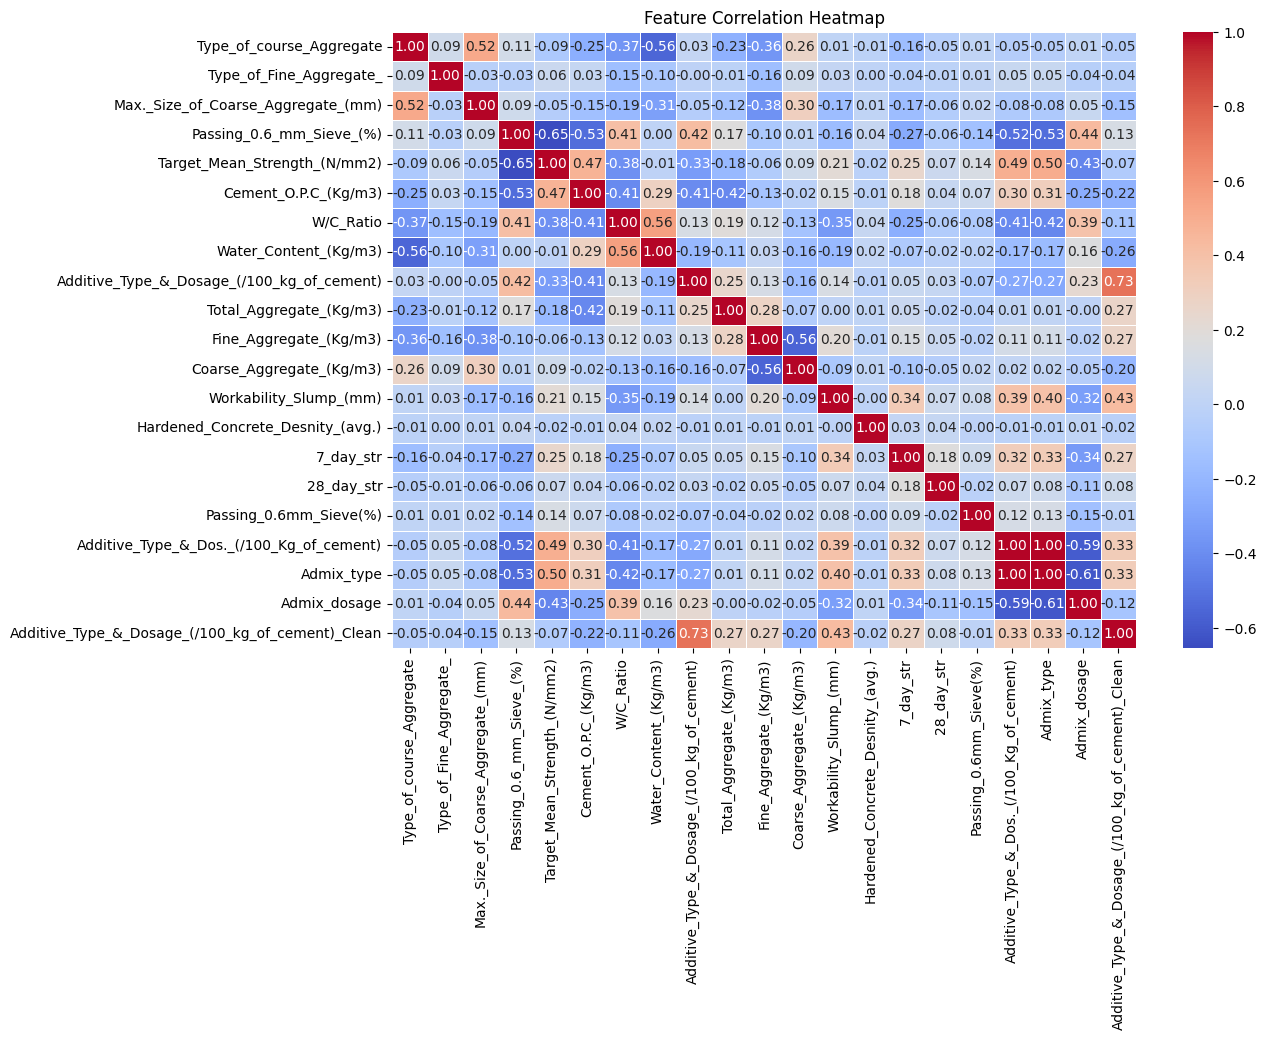

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# **Hypothesis testing**

In [98]:
df.columns

Index(['Type_of_course_Aggregate', 'Type_of_Fine_Aggregate_',
       'Max._Size_of_Coarse_Aggregate_(mm)', 'Passing_0.6_mm_Sieve_(%)',
       'Target_Mean_Strength_(N/mm2)', 'Cement_O.P.C_(Kg/m3)', 'W/C_Ratio',
       'Water_Content_(Kg/m3)', 'Additive_Type_&_Dosage_(/100_kg_of_cement)',
       'Total_Aggregate_(Kg/m3)', 'Fine_Aggregate_(Kg/m3)',
       'Coarse_Aggregate_(Kg/m3)', 'Workability_Slump_(mm)',
       'Hardened_Concrete_Desnity_(avg.)', '7_day_str', '28_day_str',
       'Passing_0.6mm_Sieve(%)', 'Additive_Type_&_Dos._(/100_Kg_of_cement)',
       'Admix_type', 'Admix_dosage',
       'Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean'],
      dtype='object')

In [99]:
continous = [
       'Passing_0.6_mm_Sieve_(%)',
       'Target_Mean_Strength_(N/mm2)','W/C_Ratio',
       'Total_Aggregate_(Kg/m3)', 'Fine_Aggregate_(Kg/m3)',
       'Coarse_Aggregate_(Kg/m3)', 'Workability_Slump_(mm)',
       'Hardened_Concrete_Desnity_(avg.)', '7_day_str', '28_day_str',
       'Passing_0.6mm_Sieve(%)'
       ]


catergory = [
    'Type_of_Fine_Aggregate_', 'Type_of_Coarse_Aggregate','Max._Size_of_Coarse_Aggregate_(mm)',
    'Cement_O.P.C_(Kg/m3)','Water_Content_(Kg/m3)','Additive_Type_&_Dosage_(/100_kg_of_cement)',
    'Type_of_Coarse_Aggregate', 'Type_of_Fine_Aggregate','Additive_Type_&_Dos._(/100_Kg_of_cement)',
       'Admix_type', 'Admix_dosage'
]

In [100]:
from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

In [101]:

#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False


In [102]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(df[d1][df[d2]==i]) > 1:
            data[i]=df[d1][df[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

In [103]:
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continous) and (j in continous):
            result=two_sample(df[i],df[j])
        elif (i in continous) and (j in catergory):
            result=annova_test(i,j)
        elif (i in catergory) and (j in continous):
            result=annova_test(j,i)
        elif (i in catergory) and (j in catergory):
            result=chisquare_cat_vs_cat(df[i],df[j])
        else: # Add an else condition to handle cases not covered by the above conditions
          result = False # Or assign a default value based on your logic
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [104]:
final_df = pd.DataFrame(final)
final_df

,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Passing_0.6_mm_Sieve_(%),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Additive_Type_&_Dosage_(/100_kg_of_cement),Total_Aggregate_(Kg/m3),...,Coarse_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Passing_0.6mm_Sieve(%),Additive_Type_&_Dos._(/100_Kg_of_cement),Admix_type,Admix_dosage,Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean
Type_of_course_Aggregate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Type_of_Fine_Aggregate_,0,1,0,1,0,1,0,1,1,1,...,0,1,1,1,1,1,0,0,0,0
Max._Size_of_Coarse_Aggregate_(mm),0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
Passing_0.6_mm_Sieve_(%),0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
Target_Mean_Strength_(N/mm2),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cement_O.P.C_(Kg/m3),0,1,1,0,0,1,0,1,1,0,...,0,0,1,0,1,1,1,1,1,0
W/C_Ratio,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Water_Content_(Kg/m3),0,1,1,0,0,1,0,1,1,0,...,0,0,1,0,1,0,1,1,1,0
Additive_Type_&_Dosage_(/100_kg_of_cement),0,1,0,0,0,1,0,1,1,0,...,0,0,1,0,1,1,0,0,0,0
Total_Aggregate_(Kg/m3),0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

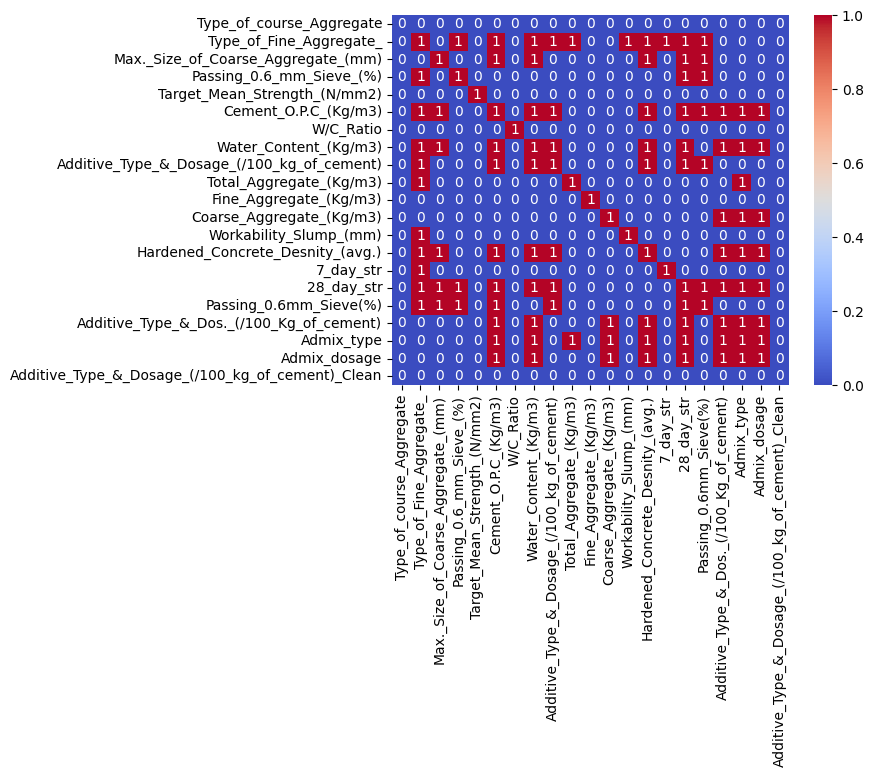

In [105]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [106]:
df.drop(columns=['Type_of_course_Aggregate'], inplace=True)

/tmp/ipython-input-387776771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Type_of_course_Aggregate'], inplace=True)


In [107]:
df

,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Passing_0.6_mm_Sieve_(%),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Additive_Type_&_Dosage_(/100_kg_of_cement),Total_Aggregate_(Kg/m3),Fine_Aggregate_(Kg/m3),Coarse_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Passing_0.6mm_Sieve(%),Additive_Type_&_Dos._(/100_Kg_of_cement),Admix_type,Admix_dosage,Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean
0,1,40,0.0,43.0,365,0.52,225,2,1870,710,1160,160,2407,21.8,26.3,0.0,2,2,57,4
1,1,40,0.0,35.0,365,0.52,225,2,1870,710,1160,160,2403,26.3,35.3,0.0,2,2,57,4
2,1,20,45.6,38.0,350,0.53,185,59,1915,725,1190,120,2475,32.7,44.9,0.0,2,2,57,205
3,1,20,57.9,38.0,340,0.49,165,16,1895,835,1060,190,2412,30.3,41.0,0.0,2,2,57,162
4,1,20,19.5,38.0,325,0.51,165,57,1910,840,1070,170,2404,27.0,0.0,0.0,2,2,57,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1,40,0.0,43.0,375,0.48,180,2,1845,700,1140,100,2404,22.4,0.0,14.9,2,2,57,4
1543,1,40,0.0,43.0,375,0.48,180,2,1845,700,1140,100,2396,22.4,29.1,14.9,2,2,57,4
1544,1,40,0.0,43.0,375,0.48,180,2,1845,685,1160,180,2405,26.1,0.0,14.7,132,90,57,134
1545,1,40,0.0,43.0,375,0.48,180,2,1845,685,1160,180,2405,26.1,30.0,14.7,132,90,57,134


# **Train the model ML**

In [108]:
df.columns

Index(['Type_of_Fine_Aggregate_', 'Max._Size_of_Coarse_Aggregate_(mm)',
       'Passing_0.6_mm_Sieve_(%)', 'Target_Mean_Strength_(N/mm2)',
       'Cement_O.P.C_(Kg/m3)', 'W/C_Ratio', 'Water_Content_(Kg/m3)',
       'Additive_Type_&_Dosage_(/100_kg_of_cement)', 'Total_Aggregate_(Kg/m3)',
       'Fine_Aggregate_(Kg/m3)', 'Coarse_Aggregate_(Kg/m3)',
       'Workability_Slump_(mm)', 'Hardened_Concrete_Desnity_(avg.)',
       '7_day_str', '28_day_str', 'Passing_0.6mm_Sieve(%)',
       'Additive_Type_&_Dos._(/100_Kg_of_cement)', 'Admix_type',
       'Admix_dosage', 'Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean'],
      dtype='object')

In [109]:
y = df['28_day_str']
x = df.drop("28_day_str",axis=1)

In [110]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((834, 19), (279, 19), (834,), (279,))

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

23.60418807817034
4.947564459420091e+16
622.9778475518053
-0.636698950686535
